In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('communities.csv')
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [2]:
df = df.replace('?',np.NaN)

In [3]:
null_cols = list()
for col in df.columns:
    if df[col].isnull().sum() > 0:
        null_cols.append(col)

null_cols

['county',
 'community',
 'OtherPerCap',
 'LemasSwornFT',
 'LemasSwFTPerPop',
 'LemasSwFTFieldOps',
 'LemasSwFTFieldPerPop',
 'LemasTotalReq',
 'LemasTotReqPerPop',
 'PolicReqPerOffic',
 'PolicPerPop',
 'RacialMatchCommPol',
 'PctPolicWhite',
 'PctPolicBlack',
 'PctPolicHisp',
 'PctPolicAsian',
 'PctPolicMinor',
 'OfficAssgnDrugUnits',
 'NumKindsDrugsSeiz',
 'PolicAveOTWorked',
 'PolicCars',
 'PolicOperBudg',
 'LemasPctPolicOnPatr',
 'LemasGangUnitDeploy',
 'PolicBudgPerPop']

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
for col in null_cols:
    df[col] = imputer.fit_transform(df[col][:,np.newaxis])

/tmp/ipykernel_27087/2947607365.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df[col] = imputer.fit_transform(df[col][:,np.newaxis])
/tmp/ipykernel_27087/2947607365.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df[col] = imputer.fit_transform(df[col][:,np.newaxis])
/tmp/ipykernel_27087/2947607365.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df[col] = imputer.fit_transform(df[col][:,np.newaxis])
/tmp/ipykernel_27087/2947607365.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version. 

In [5]:
df.shape

(1994, 128)

Text(0, 0.5, 'pct employ')

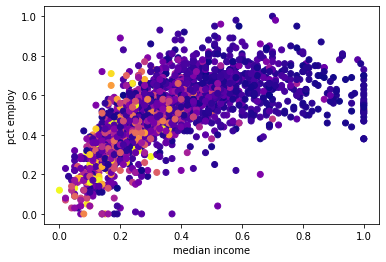

In [6]:
plt.scatter(df.medIncome, df.PctEmploy, c=df.ViolentCrimesPerPop, cmap='plasma')
plt.xlabel('median income')
plt.ylabel('pct employ')

In [7]:
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,3,1000,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,3,1000,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,0.02,0.02,0.74,0,0.00,0.12,0.67
2,24,3,1000,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,0.02,0.02,0.74,0,0.00,0.12,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,0.02,0.02,0.74,0,0.00,0.12,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,0.02,0.02,0.74,0,0.00,0.12,0.03


In [8]:
cat_cols = list()
for col in df.columns:
    if df[col].nunique()  < 10:
        cat_cols.append(col)

for col in cat_cols:
    print(f'{col}: {df[col].unique()}')

MedNumBR: [0.5 0.  1. ]
LemasGangUnitDeploy: ['0.5' '0' '1']


In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
labeller = LabelEncoder()

df.communityname = labeller.fit_transform(df.communityname)


In [10]:

y = df.ViolentCrimesPerPop
X = df.drop(['ViolentCrimesPerPop'], axis=1)

In [11]:
X_data = X 
scaller = StandardScaler()
scalled_data = scaller.fit_transform(X_data)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scalled_data)

Text(0, 0.5, 'second pca')

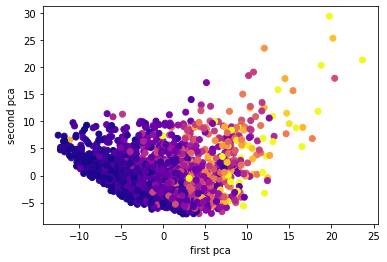

In [13]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='plasma')
plt.xlabel('first pca')
plt.ylabel('second pca')

<AxesSubplot:>

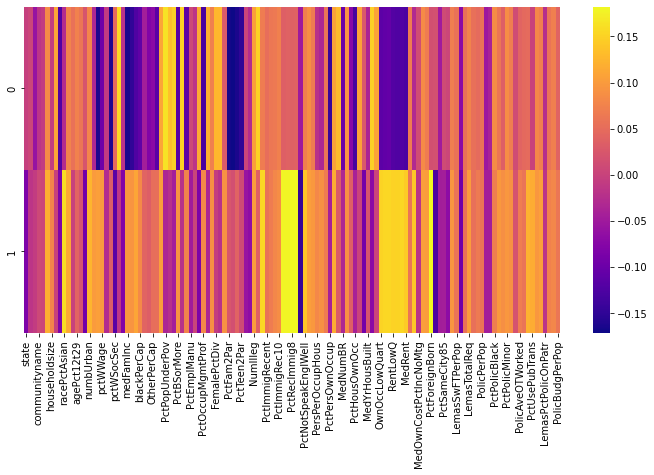

In [14]:
df_comp = pd.DataFrame(pca.components_,columns=X_data.columns)
plt.figure(figsize=(12, 6))
sns.heatmap(df_comp, cmap='plasma')

In [15]:
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(scalled_data, y, test_size=0.7)

selection = SelectPercentile()
selected_X_train = selection.fit_transform(X_train, y_train)
selected_X_test = selection.fit_transform(X_test, y_test)

In [18]:
col_index = selection.get_support()
X.columns[col_index]

Index(['racepctblack', 'racePctWhite', 'pctWInvInc', 'pctWPubAsst',
       'MalePctDivorce', 'FemalePctDiv', 'TotalPctDiv', 'PctFam2Par',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctIlleg',
       'PctPersOwnOccup'],
      dtype='object')

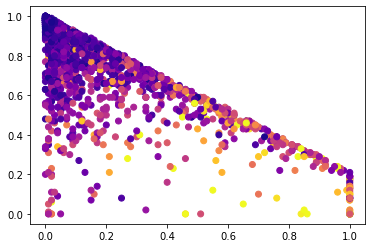

In [19]:
plt.scatter(df.racepctblack, df.racePctWhite, c=y, cmap='plasma')

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

linear = LinearRegression()
ridge  = Ridge()
ensemb = RandomForestRegressor()
neighbor = KNeighborsRegressor()

models = [linear,ridge, ensemb, neighbor]

In [ ]:
from sklearn.metrics import r2_score, max_error, mean_absolute_error

for model in models:
    model.fit(selected_X_train, y_train)
    y_pred = model.predict(selected_X_test)
    accuracy = max_error(y_test, y_pred)
    accuracy1 = r2_score(y_test, y_pred)
    accuracy2 = mean_absolute_error(y_test, y_pred)
    print(f'{model}: {accuracy} {accuracy1} {accuracy2}')

LinearRegression(): 1.1552186426217368 -0.5670241661857329 0.2264795881743486
Ridge(): 0.8558718049753284 0.40812100611145463 0.13274956780145403
RandomForestRegressor(): 0.7374 0.5212769993804149 0.12478087392550143
KNeighborsRegressor(): 0.8220000000000001 0.4604743140218106 0.12546848137535815


In [ ]:
import pickle
pickle.dump(linear, open('linear.pkl','wb'))